last edited on September 15, 2020 by Claire Valva

plots the European heat wave and resulting temperature/GPH/LWA (anticyclonic) anomaly 

In [1]:
import cartopy
import cartopy.feature as cpf
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from shapely import geometry
from collections import namedtuple
from shapely.geometry.polygon import LinearRing
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from seaborn import cubehelix_palette #for contour plot colors
import seaborn as sns
import os, fnmatch
from netCDF4 import Dataset, num2date
import cartopy.crs as ccrs
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

def find(pattern, path):
    # find files of certain pattern in each folder
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result

In [2]:
# get some nice colors
cm_data_old = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

from matplotlib.colors import LinearSegmentedColormap
parula_map = LinearSegmentedColormap.from_list('parula', cm_data_old)



In [3]:
load = True

In [4]:
if load:
    LWA1_N_name = np.array(find("*LWA1.nc", "/data/clairev/LWA_files/NH/"))
    LWA2_N_name = np.array(find("*LWA2.nc", "/data/clairev/LWA_files/NH/"))
    Z500_name = np.array(find("*Z500.nc", "/data/clairev/LWA_files/temp/"))
    T1000_name = np.array(find("*T1000.nc", "/data/clairev/LWA_files/temp/"))
    
    LWA1_N = np.array([np.array(Dataset(entry)["lwa1"]) for entry in LWA1_N_name])
    LWA2_N = np.array([np.array(Dataset(entry)["lwa2"]) for entry in LWA2_N_name])
    
    
    Z500 = np.array([np.array(Dataset(entry)["z500"]) for entry in Z500_name])
    T1000 = np.array([np.array(Dataset(entry)["t1000"]) for entry in T1000_name])

    # replace 0 values with np.nan
    summmedN = np.add(LWA1_N,LWA2_N)
    
    LWA1_N[summmedN==0.0]=np.nan
    LWA2_N[summmedN==0.0]=np.nan

    Z500[Z500==0.0]=np.nan
    T1000[T1000==0.0]=np.nan
    

In [5]:
if load:
   # take averages over each day (to prevent annoyance re: daily cycles of temp)
    Z500_means = np.nanmean(Z500, axis = 3)
    T1000_means = np.nanmean(T1000, axis = 3)

    LWA2_N_means = np.nanmean(LWA2_N, axis = 3)
    LWA1_N_means = np.nanmean(LWA1_N, axis = 3) 

/home/clairev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/home/clairev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/home/clairev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
/home/clairev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


In [6]:
def winter_reorder(ax):
    # a specific function only to pull the correct values for winter out
    return np.moveaxis(np.array([ax[:-1,:,:,:,-1],ax[1:,:,:,:,0],ax[1:,:,:,:,1]]), 0, -1)

# stack all the seasons right
def season_stack(arr):
    return np.array([winter_reorder(arr), arr[:,:,:,:,2:5],
                     arr[:,:,:,:,5:8], arr[:,:,:,:,8:11]])


In [7]:
if load:
    #stack the seasons
    Z500_stk = season_stack(Z500_means)
    T1000_stk = season_stack(T1000_means)

    LWA2_N_stk = season_stack(LWA2_N_means)
    LWA1_N_stk = season_stack(LWA1_N_means)

In [8]:
# get plotting params

In [9]:
40-26

14

In [10]:
range(int(40//1.5), int(55//1.5))

range(26, 36)

In [11]:
seasons = ["DJF", "MAM", "JJA", "SON"]
lats = [int(30//1.5), int(50//1.5)]
lons = [-6, 25]
yr_eur = 2003 - 1979
# want july and august

In [14]:
# get the wanted areas?
eur1a = LWA1_N_means[yr_eur, lats[0]:lats[1]]
eur1b = np.array([[eur1a[lat,lon] for lat in range(len(eur1a))]
         for lon in range(lons[0],lons[1])])
eur1 = np.reshape(eur1b[:,:,:,6:8], (31,13,31*2))

eur2a = LWA2_N_means[yr_eur, lats[0]:lats[1]]
eur2b = np.array([[eur2a[lat,lon] for lat in range(len(eur2a))]
         for lon in range(lons[0],lons[1])])
eur2 = np.reshape(eur2b[:,:,:,6:8], (31,13,31*2))

Za = Z500_means[yr_eur, lats[0] + 60:lats[1]+60]
Zb = np.array([[Za[lat,lon] for lat in range(len(Za))]
         for lon in range(lons[0],lons[1])])
Z = np.reshape(Zb[:,:,:,6:8], (31,13,31*2))

Ta = T1000_means[yr_eur, lats[0] + 60:lats[1]+60]
Tb = np.array([[Ta[lat,lon] for lat in range(len(Za))]
         for lon in range(lons[0],lons[1])])
T = np.reshape(Tb[:,:,:,6:8], (31,13,31*2))

In [15]:
ttt = np.nanmean(T1000_means[yr_eur,:,:,:,6:8], axis = (-1,-2))

tttn = ttt - np.nanmean(T1000_means[::,:,:,5:8], axis = (0,-1,-2))

LWA2_mean = np.nanmean(LWA2_N_means, axis = (0,-1,-2))
LWA1_mean = np.nanmean(LWA1_N_means, axis = (0,-1,-2))
Z_mean = np.nanmean(Z500_means, axis = (0,-1,-2))
T_mean = np.nanmean(T1000_means, axis = (0,-1,-2))

Tmean = np.array([[T_mean[lat + lats[0]+60,lon] for lat in range(len(Za))]
         for lon in range(lons[0],lons[1])])
Zmean = np.array([[Z_mean[lat + lats[0]+60,lon] for lat in range(len(Za))]
         for lon in range(lons[0],lons[1])])
mean1 = np.array([[LWA1_mean[lat + lats[0],lon] for lat in range(len(Za))]
         for lon in range(lons[0],lons[1])])
mean2 = np.array([[LWA2_mean[lat + lats[0],lon] for lat in range(len(Za))]
         for lon in range(lons[0],lons[1])])

lenn = 62

sumeur = np.add(eur1,eur2)


for xx in range(31):
    for yy in range(13):
        T[xx,yy] = T[xx,yy] - Tmean[xx,yy]
        Z[xx,yy] = Z[xx,yy] - Zmean[xx,yy]
        sumeur[xx,yy] = sumeur[xx,yy] - (mean1[xx,yy] + mean2[xx,yy])
        eur1[xx,yy] = eur1[xx,yy] - mean1[xx,yy]
        eur2[xx,yy] = eur2[xx,yy] - mean2[xx,yy]

/home/clairev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """
/home/clairev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


In [16]:
latsl = [xx*1.5 for xx in range(0, 61)]
lonsl = [xx*1.5 for xx in range(120)]

<Figure size 432x288 with 0 Axes>

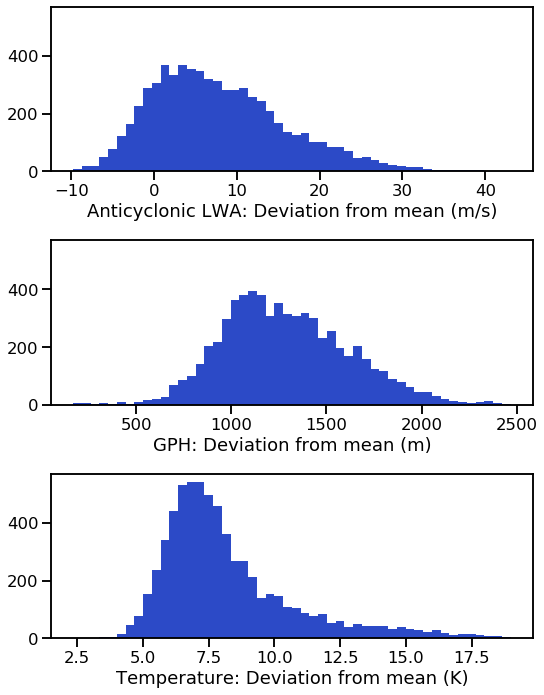

In [17]:
col = cm_data_old[5]
plt.clf()
sns.set_context("talk")
fig, axs = plt.subplots(ncols=2, nrows=3,figsize=(15, 10),sharey=True)

gs = axs[1, 1].get_gridspec()
# remove the underlying axes
for ax in axs[:, -1]:
    ax.remove()

# axbig.set_global()
axs[0,0].hist(eur2[10:,:5].flatten(), color= col, bins = 50)

axs[0,0].set_xlabel("Anticyclonic LWA: Deviation from mean (m/s)")
axs[1,0].hist(Z[10:,:5].flatten(),color= col,bins = 50)

axs[1,0].set_xlabel("GPH: Deviation from mean (m)")
axs[2,0].hist(T[10:,:5].flatten(),color= col,bins = 50)

axs[2,0].set_xlabel("Temperature: Deviation from mean (K)")
#axbig = fig.add_subplot(gs[:, -1],projection=ccrs.PlateCarree())

#hh = axbig.contourf(lonsl,latsl,tttn[60:,:120], alpha = 0.4, cmap = parula_map,transform=ccrs.PlateCarree())
#axbig.coastlines()
#plt.colorbar(hh, fraction=0.046, pad=0.04)
fig.tight_layout()
plt.savefig("/home/clairev/paper_figures/demonstation_half1.png", bbox_inches = "tight")
plt.show()

In [18]:
# explicity write min/max lats 
# and lons because life is really kind of hard
latmin = 45
latmax = 50 #latmin + 5*1.5 #int(50//1.5)
lonmin = (-6 + 10)*1.5 
lonmax = 25*1.5

/home/clairev/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  del sys.path[0]


<Figure size 432x288 with 0 Axes>

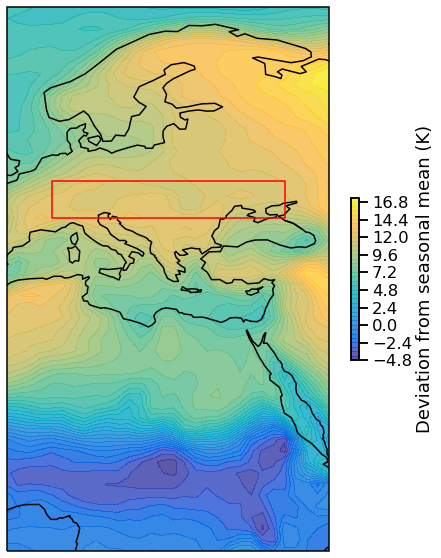

In [19]:
lats2 = [xx*1.5 for xx in range(0, 50)]
lons2 = [xx*1.5 for xx in range(30)]


plt.clf()
sns.set_context("talk")
plt.figure(figsize=(10, 10));
ax1 = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree());

hh = plt.contourf(lons2,lats2,tttn[60:(50+60),:30], alpha = 0.8,levels = 40, cmap = parula_map,transform=ccrs.PlateCarree())
ax1.coastlines()
plt.colorbar(hh, fraction=0.0146, pad=0.04, label = "Deviation from seasonal mean (K)")
plt.tight_layout()

geom = geometry.box(minx=lonmin,maxx=lonmax,miny=latmin,maxy=latmax)
ax1.add_geometries([geom], crs=ccrs.PlateCarree(), edgecolor="red", facecolor="none")

plt.savefig("/home/clairev/paper_figures/demonstation_half2.png", bbox_inches = "tight")
plt.show()

